
##  ML Assignment #2 

### <font color="blue"> Group ID : ML_GROUP006 </font>
### Group Members:

1. Ponvani : 2018AC04559
2. Bala Kavin Pon : 2018AC04531
3. Venkataramanan Krishnan : 2018AC04529
4. Poornima J : 2018AC04550 

## Problem Statement: Predict whether the patient has diabetes or not.

* Import the data from Indian diabetes dataset (Links to an external site.) and find dataset description from here (Links to an external site.) (2 points).

* Consider all columns as independent variables and assign to variable X except the last column and consider the last column as the dependent variable and assign to variable y. Remove columns which don’t help the problem statement. (1 point).
Do Feature Scaling on Independent variables (2 points).

* Split the data into train and test dataset (1 point).

* Use Keras to make the neural network model and train the dataset on the same. (4 points).

* Compute the accuracy and confusion matrix. (2 points).

In [42]:
!pip install -U scikit-learn keras tensorflow pandas-profiling[notebook,html]

  Created wheel for pandas-profiling: filename=pandas_profiling-2.4.0-py2.py3-none-any.whl size=195596 sha256=b9aa92ca23ae4da7a1e5f9d44bd1c1c6bf2368a9370be0c19655befa6c84802d
  Stored in directory: C:\Users\venka\AppData\Local\pip\Cache\wheels\b2\4b\40\ff4633a59f4e7fbdfec19b8e10e353b54b5eef125c31afe51a
Successfully built pandas-profiling
  Found existing installation: scikit-learn 0.21.3
    Uninstalling scikit-learn-0.21.3:
      Successfully uninstalled scikit-learn-0.21.3


ERROR: tensorflow 2.1.0 has requirement scipy==1.4.1; python_version >= "3", but you'll have scipy 1.3.1 which is incompatible.
ERROR: tensorboard 2.1.0 has requirement grpcio>=1.24.3, but you'll have grpcio 1.16.1 which is incompatible.
ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\space\\mars\\programs\\anaconda3\\envs\\dsenv\\lib\\site-packages\\~klearn\\linear_model\\cd_fast.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# from sklearn.externals import joblib # import joblib
# Statsmodel plot
import statsmodels.graphics.correlation as pltcor
import statsmodels.nonparametric.smoothers_lowess as lw

#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.constraints import maxnorm
from keras import regularizers

C:\Space\Mars\Programs\Anaconda3\envs\dsenv\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Space\Mars\Programs\Anaconda3\envs\dsenv\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Space\Mars\Programs\Anaconda3\envs\dsenv\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Space\Mars\Programs\Anaconda3\envs\dsenv\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Space\Mars\Programs\Anaconda3\envs\dsenv\lib\importlib\_bootstrap.py:

## Step 1: Loading Data

In [3]:
# Dataset source url
ds_url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

df = pd.read_csv(ds_url, header=None)
print(df)

      0    1   2   3    4     5      6   7  8
0     6  148  72  35    0  33.6  0.627  50  1
1     1   85  66  29    0  26.6  0.351  31  0
2     8  183  64   0    0  23.3  0.672  32  1
3     1   89  66  23   94  28.1  0.167  21  0
4     0  137  40  35  168  43.1  2.288  33  1
..   ..  ...  ..  ..  ...   ...    ...  .. ..
763  10  101  76  48  180  32.9  0.171  63  0
764   2  122  70  27    0  36.8  0.340  27  0
765   5  121  72  23  112  26.2  0.245  30  0
766   1  126  60   0    0  30.1  0.349  47  1
767   1   93  70  31    0  30.4  0.315  23  0

[768 rows x 9 columns]


In [4]:
def show_dataframe(df):
    print(df.info())
    print("=="*40)
    print(df.head())
    
# Invoking show_dataframe to view the meta info
show_dataframe(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
0    768 non-null int64
1    768 non-null int64
2    768 non-null int64
3    768 non-null int64
4    768 non-null int64
5    768 non-null float64
6    768 non-null float64
7    768 non-null int64
8    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
   0    1   2   3    4     5      6   7  8
0  6  148  72  35    0  33.6  0.627  50  1
1  1   85  66  29    0  26.6  0.351  31  0
2  8  183  64   0    0  23.3  0.672  32  1
3  1   89  66  23   94  28.1  0.167  21  0
4  0  137  40  35  168  43.1  2.288  33  1


### Adding Header to the data

In [5]:
# Naming the column headers
col_names = ["pregnancies_times", "glucose", "bp", "skin_thickness","insulin","bmi","Diabetes_Pedigree_Function","age","outcome"]
df.columns = col_names

show_dataframe(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies_times             768 non-null int64
glucose                       768 non-null int64
bp                            768 non-null int64
skin_thickness                768 non-null int64
insulin                       768 non-null int64
bmi                           768 non-null float64
Diabetes_Pedigree_Function    768 non-null float64
age                           768 non-null int64
outcome                       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
   pregnancies_times  glucose  bp  skin_thickness  insulin   bmi  Diabetes_Pedigree_Function  age  outcome
0                  6      148  72              35        0  33.6                       0.627   50        1
1                  1       85  66              29        0  26.6                       0.351   31        0
2                  8      183  64               0        0  23.3          

## 2. Exploratory Data Analysis(EDA)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pregnancies_times,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
bp,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin_thickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
Diabetes_Pedigree_Function,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Findings on attributes

1. `bmi`, `bp`, `Insulin`, `skin_thickness` and `glucose` has 0 values, which is idealy not possible
   - Treating '0' as unknown for all these columns
   - The attributes are imputed with mean of the values 
   
2. Continious features are at different scale
   - will go for feature scaling 

In [7]:
for cols in ['glucose','bp','skin_thickness','insulin','bmi']:
    df.loc[df[cols] == 0,cols]= df[cols].mean(skipna=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pregnancies_times,768.0,3.845052,3.369578,0.000,1.000000,3.000000,6.00000,17.00
glucose,768.0,121.681605,30.436016,44.000,99.750000,117.000000,140.25000,199.00
bp,768.0,72.254807,12.115932,24.000,64.000000,72.000000,80.00000,122.00
skin_thickness,768.0,26.606479,9.631241,7.000,20.536458,23.000000,32.00000,99.00
insulin,768.0,118.660163,93.080358,14.000,79.799479,79.799479,127.25000,846.00
bmi,768.0,32.450805,6.875374,18.200,27.500000,32.000000,36.60000,67.10
Diabetes_Pedigree_Function,768.0,0.471876,0.331329,0.078,0.243750,0.372500,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.000000,29.000000,41.00000,81.00
outcome,768.0,0.348958,0.476951,0.000,0.000000,0.000000,1.00000,1.00


### Find Correlation with the class variable

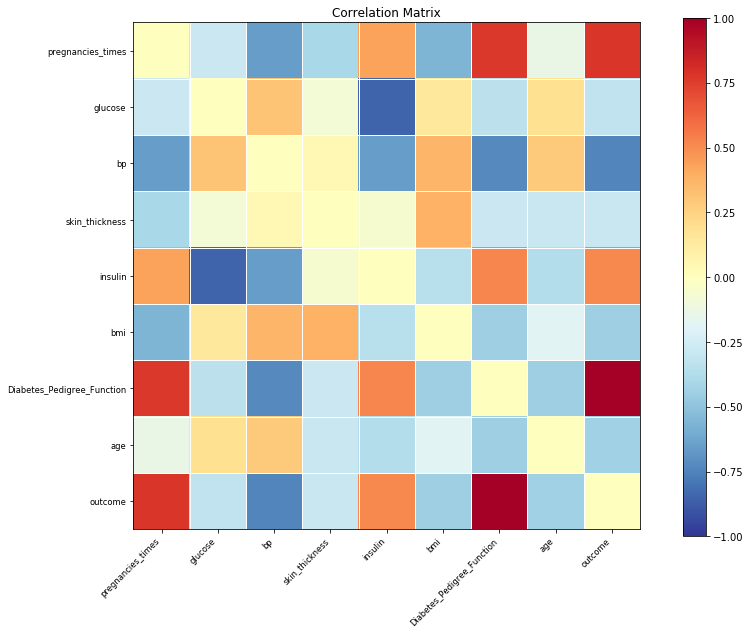

In [74]:
from sklearn import preprocessing

# Taking the values as a matrix
data_arry = df.values
# Scale the matrix values to calculate the correlation coefficient
data_arry = preprocessing.scale(data_arry, axis=1)
corrs = np.corrcoef(data_arry,rowvar=0)
np.fill_diagonal(corrs, 0)
# Datasets column names
col_names = df.columns

fig = plt.figure(figsize=(9,9))
ax = fig.gca()
# Plotting the correlation coeff. data into a correlation plot
pltcor.plot_corr(corrs, xnames=col_names, ax=ax, normcolor=True)
cax = fig.add_axes([1.05, 0.161, 0.035, 0.8])
fig.colorbar(fig.axes[0].images[0], cax=cax)
plt.show()

### Extract X and Y columns

In [37]:
from sklearn.model_selection import train_test_split
Y = df['outcome']
X = df.drop(columns=['outcome'])

### Normalizing the data

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
print(X)

[[ 0.63994726  0.86527574 -0.0210444  ...  0.16725546  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20598931 -0.51658286 ... -0.85153454 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01597855 -0.68176235 ... -1.33182125  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02240928 -0.0210444  ... -0.90975111 -0.68519336
  -0.27575966]
 [-0.84488505  0.14197684 -1.01212132 ... -0.34213954 -0.37110101
   1.17073215]
 [-0.84488505 -0.94297153 -0.18622389 ... -0.29847711 -0.47378505
  -0.87137393]]


### Test Train Split 

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=98,stratify=Y)
print('X_train size {} , X_test size {}'.format(X_train.shape,X_test.shape))

X_train size (537, 8) , X_test size (231, 8)


In [40]:
print (Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: outcome, Length: 768, dtype: int64


# Neural network

## Model 1

In [51]:
model = Sequential()
model.add(Dense(8, input_dim=8, activation='relu')) # Input layer with 8 nodes
model.add(Dense(6, activation='relu')) # Hidden layer with 8 activation nodes
model.add(Dense(1, activation='sigmoid')) # Output layer with 1 node

### Compile the keras model

In [52]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Fit the keras model on the dataset

In [53]:
history = model.fit(X_train, y_train, validation_split=0.3, epochs=200, batch_size=32,verbose=0)

## Accuracy Calculation  -- Evaluate the keras model

In [54]:
_, accuracy = model.evaluate(X, Y)
print('Accuracy: %.2f' % (accuracy*100))

768/768 [==============================] - 0s 37us/step
Accuracy: 80.21


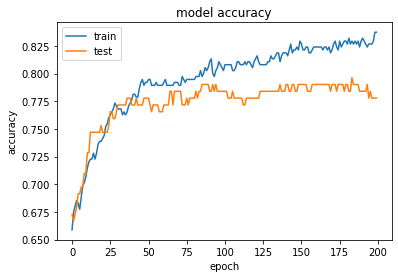

In [55]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

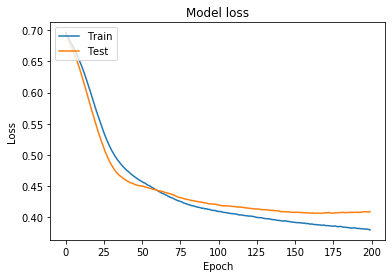

In [56]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Model is overfitting
   - Hence adding regularization params and increasing the learning rate

In [57]:
model = Sequential()
model.add(Dense(8, input_dim=8, kernel_regularizer=regularizers.l1(0.01), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4,kernel_regularizer=regularizers.l2(0.01), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### Compile the keras model

In [58]:
from keras import optimizers
sgd = optimizers.SGD(lr=0.02, momentum=0.6)
model.compile(loss='binary_crossentropy',optimizer=sgd, metrics=['accuracy'])

### Fit the keras model on the dataset

In [60]:
history = model.fit(X_train, y_train, validation_split=0.3, epochs=200, batch_size=32, verbose=0,shuffle=True)

## Accuracy Calculation  -- Evaluate the keras model

In [61]:
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

537/537 [==============================] - 0s 24us/step
Accuracy: 79.70


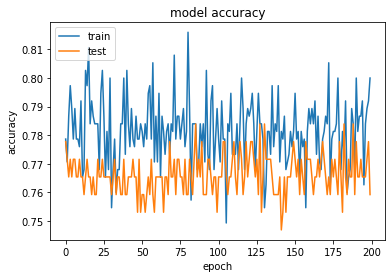

In [62]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

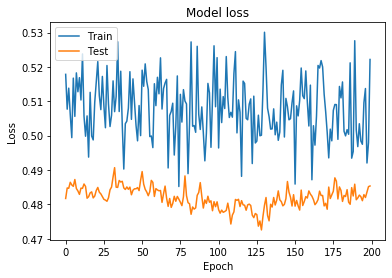

In [63]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Make probability predictions with the model

In [64]:
predictions = model.predict(X_test)
# round predictions 
rounded = [round(x[0]) for x in predictions]

### Make class predictions (y) with the model

In [65]:
y_pred = model.predict_classes(X_test)

## Confustion Matrix

In [66]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred))
TN, FP, FN, TP = metrics.confusion_matrix(y_test, y_pred).ravel()
(TN, FP, FN, TP)

[[124  26]
 [ 28  53]]


(124, 26, 28, 53)

## Classification Accuracy: Overall, how often is the classifier correct?

In [67]:

# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred))

0.7662337662337663
0.7662337662337663


### Classification Error: Overall, how often is the classifier incorrect Also known as "Misclassification Rate"

In [68]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred))

0.23376623376623376
0.23376623376623373


## Sensitivity:
### When the actual value is positive, how often is the prediction correct

In [69]:
sensitivity = TP / float(FN + TP)
print(sensitivity)
print(metrics.recall_score(y_test, y_pred))

0.654320987654321
0.654320987654321


## Specificity:
### When the actual value is negative, how often is the prediction correct

In [70]:
specificity = TN / (TN + FP)
print(specificity)

0.8266666666666667


### False Positive Rate: When the actual value is negative, how often is the prediction incorrect false_positive_rate = FP / float(TN + FP)

In [71]:
false_positive_rate = FP / float(TN + FP)
print(false_positive_rate)
print(1 - specificity)

0.17333333333333334
0.17333333333333334


### Precision: When a positive value is predicted, how often is the prediction correct

In [72]:
precision = TP / float(TP + FP)
print(precision)
print(metrics.precision_score(y_test, y_pred))

0.6708860759493671
0.6708860759493671
